# Problem Session 12
## MNIST of Fashion II

In this notebook you will work on problems that relate to our neural network content. In particular, this material will touch on the following lecture notebooks:
- `Lectures/Neural Networks/2. The MNIST Data Set`,
- `Lectures/Neural Networks/3. Multilayer Neural Networks`,
- `Lectures/Neural Networks/4. keras`,
- `Lectures/Neural Networks/5. Introduction to Convolutional Neural Networks` and
- `Lectures/Neural Networks/7. Loading Pre-Trained Models`.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from seaborn import set_style

set_style("whitegrid")

##### 1. Load the data

In this notebook you will continue to work to build neural networks to classify images of common fashion items. First run the code below in order to load the data set.

In [2]:
## docs: https://keras.io/api/datasets/fashion_mnist/
from keras.datasets import fashion_mnist

In [3]:
## This can take a little bit to run,
## especially if it is your first time running this code
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

label_dict = {0:"T-shirt/top",
                 1:"Trouser",
                 2:"Pullover",
                 3:"Dress",
                 4:"Coat",
                 5:"Sandal",
                 6:"Shirt",
                 7:"Sneaker",
                 8:"Bag",
                 9:"Ankle boot"}

##### 2. Validation set and scaling

Create a validation set with $20\%$ of the training set. Also scale the data by dividing by the maximum pixel value, $255$.

##### Sample Solution

In [4]:
X_train = X_train/255
X_test = X_test/255

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_tt, X_val, y_tt, y_val = train_test_split(X_train, y_train,
                                               shuffle=True,
                                               random_state=213,
                                               test_size=.2)

##### 3. Loading a feed forward model

In `Problem Session 11` you worked to build a number of feed forward models for this classification problem. If your group was able to make it to the end of that notebook you would have saved the neural network model that performed best.

Load the model here for comparison purposes at the end of this notebook.

<i>If you were not able to save a model while working on `Problem Session 11`, you can load `nb11_matts_final_model` here. This model was trained on the PCA transformed version of the data.</i>

In [7]:
from keras.models import load_model

In [8]:
nb_11_model = load_model("nb11_matts_final_model")

##### 4. A first convolutional neural network

As a first convolution neural network, try building a CNN with a single convolutional layer of depth $64$ using a $3\times 3$ filter followed by a pooling layer using a $2\times 2$ filter with size $2$ strides.

In [9]:
## Import what you need from keras
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical

In [10]:
## Make convolutional neural net reshaped versions
## of the training and validation data
X_tt_conv = X_tt.reshape(-1, 28, 28, 1)
X_val_conv = X_val.reshape(-1, 28, 28, 1)

In [11]:
## Make an empty sequential model
model1 = models.Sequential()

## Add the convolutional layer here
model1.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)))

## Add the pooling layer here
model1.add(layers.MaxPooling2D((2,2), strides=2))

## Add the flatten layer
model1.add(layers.Flatten())

## Add the feed forward layer, use 64 nodes
model1.add(layers.Dense(64, activation='relu'))

## Add the output layer
model1.add(layers.Dense(10, activation='softmax'))

## Some compile step from notebook 11
model1.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [12]:
## fit the model for 25 epochs, this can take a bit
n_epochs=25
history1 = model1.fit(X_tt_conv, 
                      to_categorical(y_tt), 
                      epochs=n_epochs, 
                      batch_size=512,
                      validation_data=(X_val_conv,to_categorical(y_val)))

history_dict1 = history1.history

2022-05-18 13:37:25.404527: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-18 13:37:25.404679: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/25
94/94 [==============================] - 5s 56ms/step - loss: 0.7144 - accuracy: 0.7491 - val_loss: 0.4718 - val_accuracy: 0.8301
Epoch 2/25
94/94 [==============================] - 5s 54ms/step - loss: 0.4239 - accuracy: 0.8492 - val_loss: 0.3890 - val_accuracy: 0.8589
Epoch 3/25
94/94 [==============================] - 5s 52ms/step - loss: 0.3515 - accuracy: 0.8744 - val_loss: 0.3355 - val_accuracy: 0.8827
Epoch 4/25
94/94 [==============================] - 5s 52ms/step - loss: 0.3139 - accuracy: 0.8893 - val_loss: 0.3159 - val_accuracy: 0.8855
Epoch 5/25
94/94 [==============================] - 5s 51ms/step - loss: 0.2852 - accuracy: 0.8990 - val_loss: 0.3031 - val_accuracy: 0.8924
Epoch 6/25
94/94 [==============================] - 5s 51ms/step - loss: 0.2667 - accuracy: 0.9051 - val_loss: 0.2818 - val_accuracy: 0.9003
Epoch 7/25
94/94 [==============================] - 5s 51ms/step - loss: 0.2488 - accuracy: 0.9108 - val_loss: 0.2777 - val_accuracy: 0.9007
Epoch 8/25
94

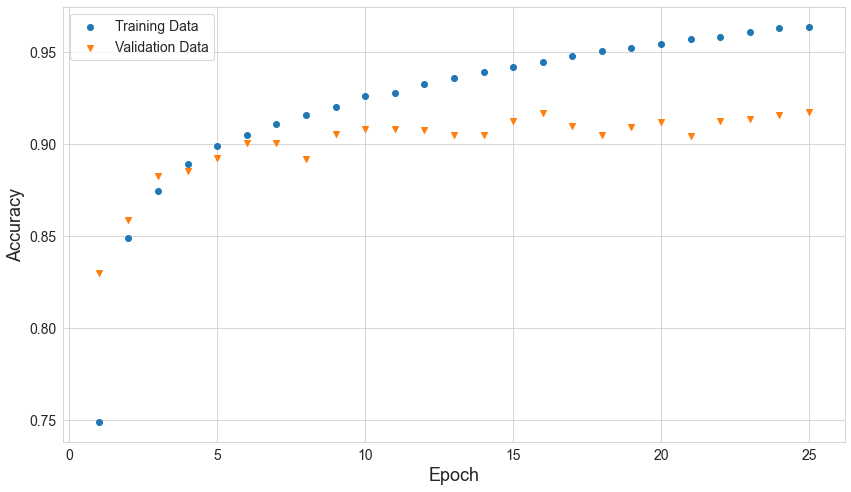

In [13]:
## Plot the training set accuracy and the validation set accuracy
## against the number of epochs trained
plt.figure(figsize=(14,8))

plt.scatter(range(1,n_epochs+1), 
            history_dict1['accuracy'], 
            label="Training Data")
plt.scatter(range(1,n_epochs+1), 
            history_dict1['val_accuracy'], 
            marker='v',
            label="Validation Data")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

##### 5. Adding in padding

Add in the `padding='same'` argument to the convolutional layer from the network above. Fit this network and compare the validation accuracies for `model2` and `model1`.

In [14]:
## Make an empty sequential model
model2 = models.Sequential()

## Add the convolutional layer here
model2.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))

## Add the pooling layer here
model2.add(layers.MaxPooling2D((2,2), strides=2))

## Add the flatten layer
model2.add(layers.Flatten())

## Add the feed forward layer, use 64 nodes
model2.add(layers.Dense(64, activation='relu'))

## Add the output layer
model2.add(layers.Dense(10, activation='softmax'))

## Same compile step from notebook 11
model2.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [15]:
history2 = model2.fit(X_tt_conv, 
                      to_categorical(y_tt), 
                      epochs=n_epochs, 
                      batch_size=512,
                      validation_data=(X_val_conv,to_categorical(y_val)))

history_dict2 = history2.history

Epoch 1/25
94/94 [==============================] - 6s 61ms/step - loss: 0.6839 - accuracy: 0.7620 - val_loss: 0.4911 - val_accuracy: 0.8154
Epoch 2/25
94/94 [==============================] - 6s 60ms/step - loss: 0.4020 - accuracy: 0.8563 - val_loss: 0.4000 - val_accuracy: 0.8563
Epoch 3/25
94/94 [==============================] - 6s 60ms/step - loss: 0.3383 - accuracy: 0.8786 - val_loss: 0.3210 - val_accuracy: 0.8878
Epoch 4/25
94/94 [==============================] - 6s 60ms/step - loss: 0.3023 - accuracy: 0.8925 - val_loss: 0.2988 - val_accuracy: 0.8935
Epoch 5/25
94/94 [==============================] - 6s 60ms/step - loss: 0.2789 - accuracy: 0.9001 - val_loss: 0.3012 - val_accuracy: 0.8933
Epoch 6/25
94/94 [==============================] - 6s 60ms/step - loss: 0.2596 - accuracy: 0.9059 - val_loss: 0.2860 - val_accuracy: 0.8981
Epoch 7/25
94/94 [==============================] - 6s 60ms/step - loss: 0.2439 - accuracy: 0.9122 - val_loss: 0.3069 - val_accuracy: 0.8848
Epoch 8/25
94

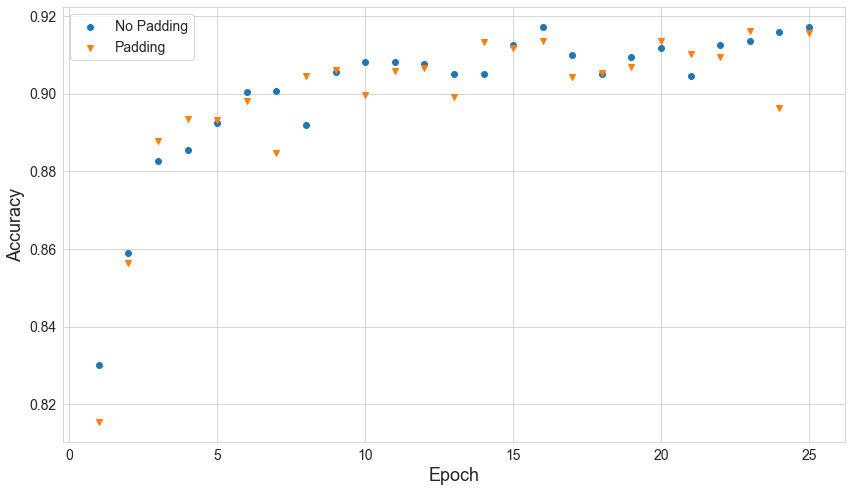

In [16]:
## Plot the validation set accuracy for model1 and model2
## against the number of epochs trained
plt.figure(figsize=(14,8))

plt.scatter(range(1,n_epochs+1), 
            history_dict1['val_accuracy'], 
            label="No Padding")
plt.scatter(range(1,n_epochs+1), 
            history_dict2['val_accuracy'], 
            marker='v',
            label="Padding")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

How does the performance compare?

##### Sample Solution

It's similar.

##### 6. Adding a dropout layer

Sometimes while building convolutional or recurrent neural networks you will add what is known as a <i>dropout</i> layer before the final feed forward layer of the network.

A dropout layer will randomly turn off input nodes with a probability that you select when setting up the network. For example a dropout layer with probability $0.25$ will turn each of the input nodes to $0$ with probability $0.25$. 

This may seem counterintuitive because we will be getting rid of some of the work the previous layers of our network have done. However, neural networks have a ton of parameters, meaning that they tend to overfit on the training data. By randomly turning some nodes to $0$ we lessen the networks ability to overfit, which may in turn improve performance on observations not included in the training set.

For `model3` use your results from above to choose either `model1` or `model2` and then add a dropout layer between  the `.Flatten()` layer and the `Dense(64)` layer. Dropout layers can be inserted in `keras` with `layers.Dropout(dropout_probability)`.

In [17]:
## Make an empty sequential model
model3 = models.Sequential()

## Add the convolutional layer here
model3.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)))

## Add the pooling layer here
model3.add(layers.MaxPooling2D((2,2), strides=2))

## Add the flatten layer
model3.add(layers.Flatten())

## Add the dropout layer, set the dropout probability to .5
model3.add(layers.Dropout(.5))

## Add the feed forward layer, use 64 nodes
model3.add(layers.Dense(64, activation='relu'))

## Add the output layer
model3.add(layers.Dense(10, activation='softmax'))

## Same compile step from notebook 11
model3.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [18]:
history3 = model3.fit(X_tt_conv, 
                      to_categorical(y_tt), 
                      epochs=n_epochs, 
                      batch_size=512,
                      validation_data=(X_val_conv,to_categorical(y_val)))

history_dict3 = history3.history

Epoch 1/25
94/94 [==============================] - 6s 63ms/step - loss: 0.6901 - accuracy: 0.7628 - val_loss: 0.4485 - val_accuracy: 0.8403
Epoch 2/25
94/94 [==============================] - 6s 62ms/step - loss: 0.4122 - accuracy: 0.8542 - val_loss: 0.3703 - val_accuracy: 0.8674
Epoch 3/25
94/94 [==============================] - 6s 62ms/step - loss: 0.3497 - accuracy: 0.8753 - val_loss: 0.3454 - val_accuracy: 0.8758
Epoch 4/25
94/94 [==============================] - 6s 62ms/step - loss: 0.3194 - accuracy: 0.8852 - val_loss: 0.3302 - val_accuracy: 0.8798
Epoch 5/25
94/94 [==============================] - 6s 62ms/step - loss: 0.2929 - accuracy: 0.8952 - val_loss: 0.2842 - val_accuracy: 0.9006
Epoch 6/25
94/94 [==============================] - 6s 62ms/step - loss: 0.2767 - accuracy: 0.8992 - val_loss: 0.3080 - val_accuracy: 0.8899
Epoch 7/25
94/94 [==============================] - 6s 63ms/step - loss: 0.2641 - accuracy: 0.9046 - val_loss: 0.2860 - val_accuracy: 0.8958
Epoch 8/25
94

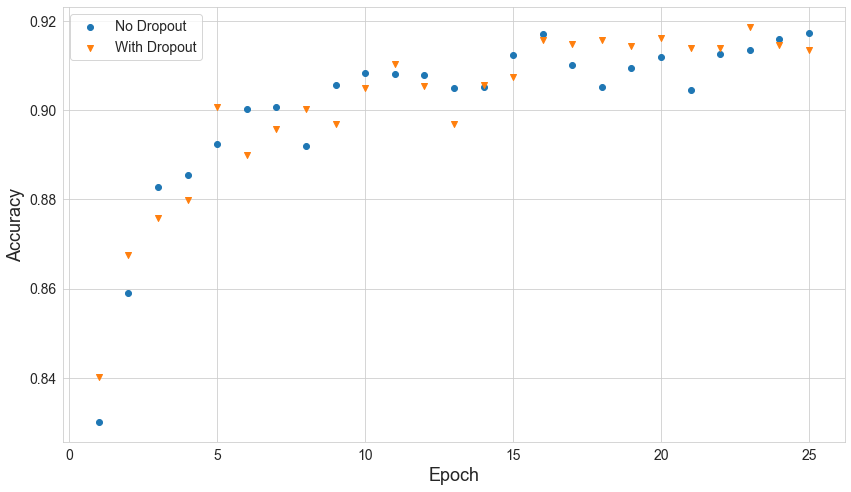

In [19]:
## Plot the validation set accuracy for your chosen model and model3
## against the number of epochs trained
plt.figure(figsize=(14,8))

plt.scatter(range(1,n_epochs+1), 
            history_dict1['val_accuracy'], 
            label="No Dropout")
plt.scatter(range(1,n_epochs+1), 
            history_dict3['val_accuracy'], 
            marker='v',
            label="With Dropout")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)


plt.show()

How does the model with dropout compare to the equivalent model without dropout?

##### Sample Solution

The dropout seems to provide slightly better performance than the model without dropout.

##### 6. Choosing a final convolutional neural network model

Select one convolutional neural network model from the three models we have considered in this notebook.

Remake the model and train it to the appropriate number of epochs.

##### Sample Solution

I went with `model3`.

In [20]:
## Make an empty sequential model
cnn_final_model = models.Sequential()

## Add the convolutional layer here
cnn_final_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)))

## Add the pooling layer here
cnn_final_model.add(layers.MaxPooling2D((2,2), strides=2))

## Add the flatten layer
cnn_final_model.add(layers.Flatten())

## Add the dropout layer, set the dropout probability to .5
cnn_final_model.add(layers.Dropout(.5))

## Add the feed forward layer, use 64 nodes
cnn_final_model.add(layers.Dense(64, activation='relu'))

## Add the output layer
cnn_final_model.add(layers.Dense(10, activation='softmax'))

## Same compile step from notebook 11
cnn_final_model.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [21]:
history_cnn_final = cnn_final_model.fit(X_tt_conv, 
                      to_categorical(y_tt), 
                      epochs=20, 
                      batch_size=512,
                      validation_data=(X_val_conv,to_categorical(y_val)))

history_dict_cnn_final = history_cnn_final.history

Epoch 1/20
94/94 [==============================] - 6s 63ms/step - loss: 0.6704 - accuracy: 0.7667 - val_loss: 0.4431 - val_accuracy: 0.8409
Epoch 2/20
94/94 [==============================] - 6s 63ms/step - loss: 0.4036 - accuracy: 0.8565 - val_loss: 0.3592 - val_accuracy: 0.8718
Epoch 3/20
94/94 [==============================] - 6s 63ms/step - loss: 0.3463 - accuracy: 0.8760 - val_loss: 0.3218 - val_accuracy: 0.8849
Epoch 4/20
94/94 [==============================] - 6s 62ms/step - loss: 0.3143 - accuracy: 0.8874 - val_loss: 0.3125 - val_accuracy: 0.8857
Epoch 5/20
94/94 [==============================] - 6s 63ms/step - loss: 0.2939 - accuracy: 0.8945 - val_loss: 0.2924 - val_accuracy: 0.8967
Epoch 6/20
94/94 [==============================] - 6s 62ms/step - loss: 0.2762 - accuracy: 0.9007 - val_loss: 0.2755 - val_accuracy: 0.9008
Epoch 7/20
94/94 [==============================] - 6s 63ms/step - loss: 0.2618 - accuracy: 0.9049 - val_loss: 0.2840 - val_accuracy: 0.8969
Epoch 8/20
94

##### 7. Compare to feed forward

Compare the validation set accuracy of this network to the accuracy from the pre-trained model you loaded.

<i>If you are using `nb11_matts_final_model` you will need to run the data through PCA trained on the training set with `n_components = .99`</i>.

In [22]:
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

In [23]:
pca = PCA(n_components = .99)

pca.fit(X_tt.reshape(-1, 28*28))

X_tt_pca = pca.transform(X_tt.reshape(-1, 28*28))
X_val_pca = pca.transform(X_val.reshape(-1, 28*28))

In [24]:
## Feed forward validation accuracy
accuracy_score(y_val, np.argmax(nb_11_model.predict(X_val_pca), axis=1))

0.8838333333333334

In [25]:
## CNN validation accuracy
accuracy_score(y_val, np.argmax(cnn_final_model.predict(X_val_conv), axis=1))

0.9195833333333333

An improvement.

##### 8. Performance on the test set

While you are free to fiddle around and try additional neural networks, this problem assumes that you have landed on a final network.

Gauge the performance of your final network on the test set.

Compare it to its performance on the training set.

In [26]:
del cnn_final_model


## Make an empty sequential model
cnn_final_model = models.Sequential()

## Add the convolutional layer here
cnn_final_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28,28,1)))

## Add the pooling layer here
cnn_final_model.add(layers.MaxPooling2D((2,2), strides=2))

## Add the flatten layer
cnn_final_model.add(layers.Flatten())

## Add the dropout layer, set the dropout probability to .5
cnn_final_model.add(layers.Dropout(.5))

## Add the feed forward layer, use 64 nodes
cnn_final_model.add(layers.Dense(64, activation='relu'))

## Add the output layer
cnn_final_model.add(layers.Dense(10, activation='softmax'))

## Same compile step from notebook 11
cnn_final_model.compile(optimizer = 'rmsprop',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])

In [27]:
history_cnn_final = cnn_final_model.fit(X_train.reshape(-1, 28, 28, 1), 
                      to_categorical(y_train), 
                      epochs=20, 
                      batch_size=512)

history_dict_cnn_final = history_cnn_final.history

Epoch 1/20
118/118 [==============================] - 7s 61ms/step - loss: 0.6656 - accuracy: 0.7591
Epoch 2/20
118/118 [==============================] - 7s 62ms/step - loss: 0.4013 - accuracy: 0.8564
Epoch 3/20
118/118 [==============================] - 7s 60ms/step - loss: 0.3454 - accuracy: 0.8767
Epoch 4/20
118/118 [==============================] - 7s 61ms/step - loss: 0.3120 - accuracy: 0.8886
Epoch 5/20
118/118 [==============================] - 7s 61ms/step - loss: 0.2893 - accuracy: 0.8960
Epoch 6/20
118/118 [==============================] - 7s 61ms/step - loss: 0.2721 - accuracy: 0.9027
Epoch 7/20
118/118 [==============================] - 7s 60ms/step - loss: 0.2568 - accuracy: 0.9064
Epoch 8/20
118/118 [==============================] - 7s 64ms/step - loss: 0.2447 - accuracy: 0.9114
Epoch 9/20
118/118 [==============================] - 7s 60ms/step - loss: 0.2352 - accuracy: 0.9136
Epoch 10/20
118/118 [==============================] - 7s 60ms/step - loss: 0.2246 - accura

In [28]:
print("Training set accuracy")
print("++++++++++++++++++++++++++++")
accuracy_score(y_train, np.argmax(cnn_final_model.predict(X_train.reshape(-1, 28, 28, 1)), axis=1))

Training set accuracy
++++++++++++++++++++++++++++


0.9240666666666667

In [29]:
print("Test set accuracy")
print("++++++++++++++++++++++++++++")
accuracy_score(y_test, np.argmax(cnn_final_model.predict(X_test.reshape(-1, 28, 28, 1)), axis=1))

Test set accuracy
++++++++++++++++++++++++++++


0.8923

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2022.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)